
Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Reading CSV Files

In [5]:
df = pd.read_csv(r"C:\Users\neeth\Downloads\sensor_data (1).csv")


Exploring the Data

In [7]:
df.head()

,Timestamp,Boiler Name,Temperature,Anomaly
0,2023-01-23 00:58:20,Boiler A,20.180428,0
1,2023-01-30 06:30:08,Boiler A,23.372948,0
2,2023-01-03 10:47:23,Boiler A,29.858208,0
3,2023-01-03 17:10:50,Boiler C,20.564032,0
4,2023-01-04 17:50:22,Boiler D,23.547024,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    1000 non-null   object 
 1   Boiler Name  1000 non-null   object 
 2   Temperature  1000 non-null   float64
 3   Anomaly      1000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [11]:
df.describe()

,Temperature,Anomaly
count,1000.000000,1000.000000
mean,25.795237,0.024000
std,8.206830,0.153126
min,1.793127,0.000000
25%,21.847202,0.000000
50%,25.120639,0.000000
75%,28.567648,0.000000
max,94.007501,1.000000


In [13]:
df.isnull().sum()

Timestamp      0
Boiler Name    0
Temperature    0
Anomaly        0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [17]:
df['Boiler Name'].unique()

array(['Boiler A', 'Boiler C', 'Boiler D', 'Boiler B'], dtype=object)

In [19]:
df['Boiler Name'].value_counts()

Boiler Name
Boiler C    284
Boiler D    263
Boiler A    233
Boiler B    220
Name: count, dtype: int64

In [21]:
df['Anomaly'].unique()

array([0, 1], dtype=int64)

In [23]:
df['Anomaly'].value_counts()

Anomaly
0    976
1     24
Name: count, dtype: int64

EDA

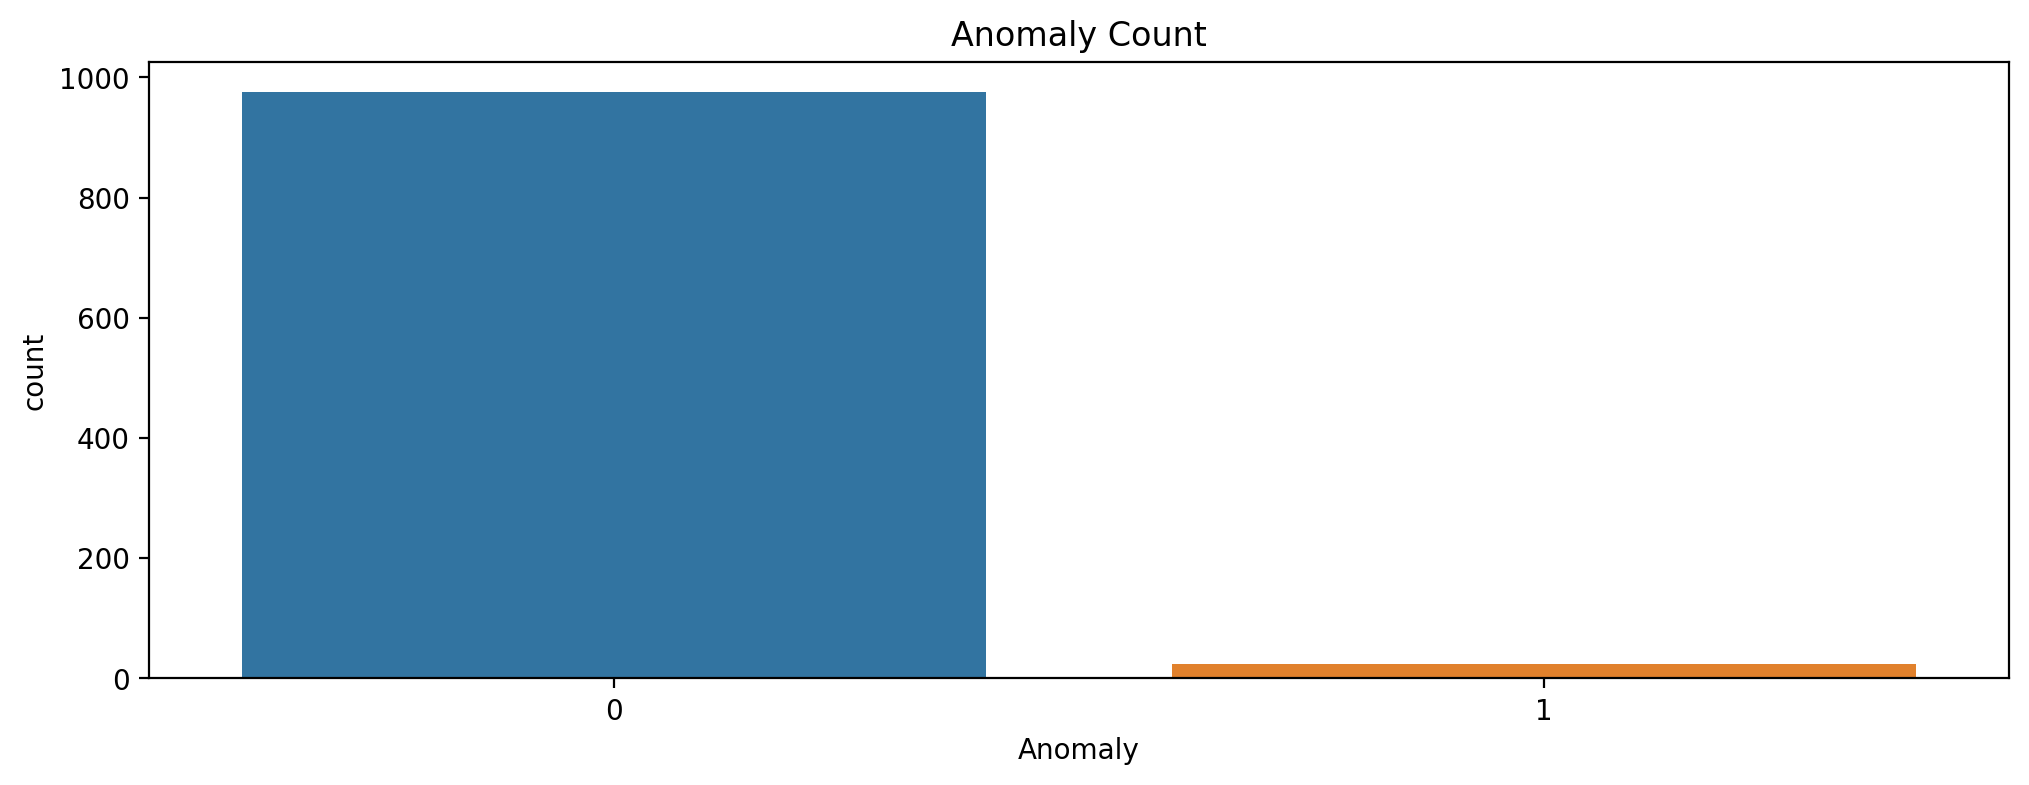

In [33]:
plt.figure(figsize=(12, 4), dpi=200)
sns.countplot(data=df, x='Anomaly')
plt.title('Anomaly Count')
plt.show()


AttributeError: 'numpy.int64' object has no attribute 'startswith'

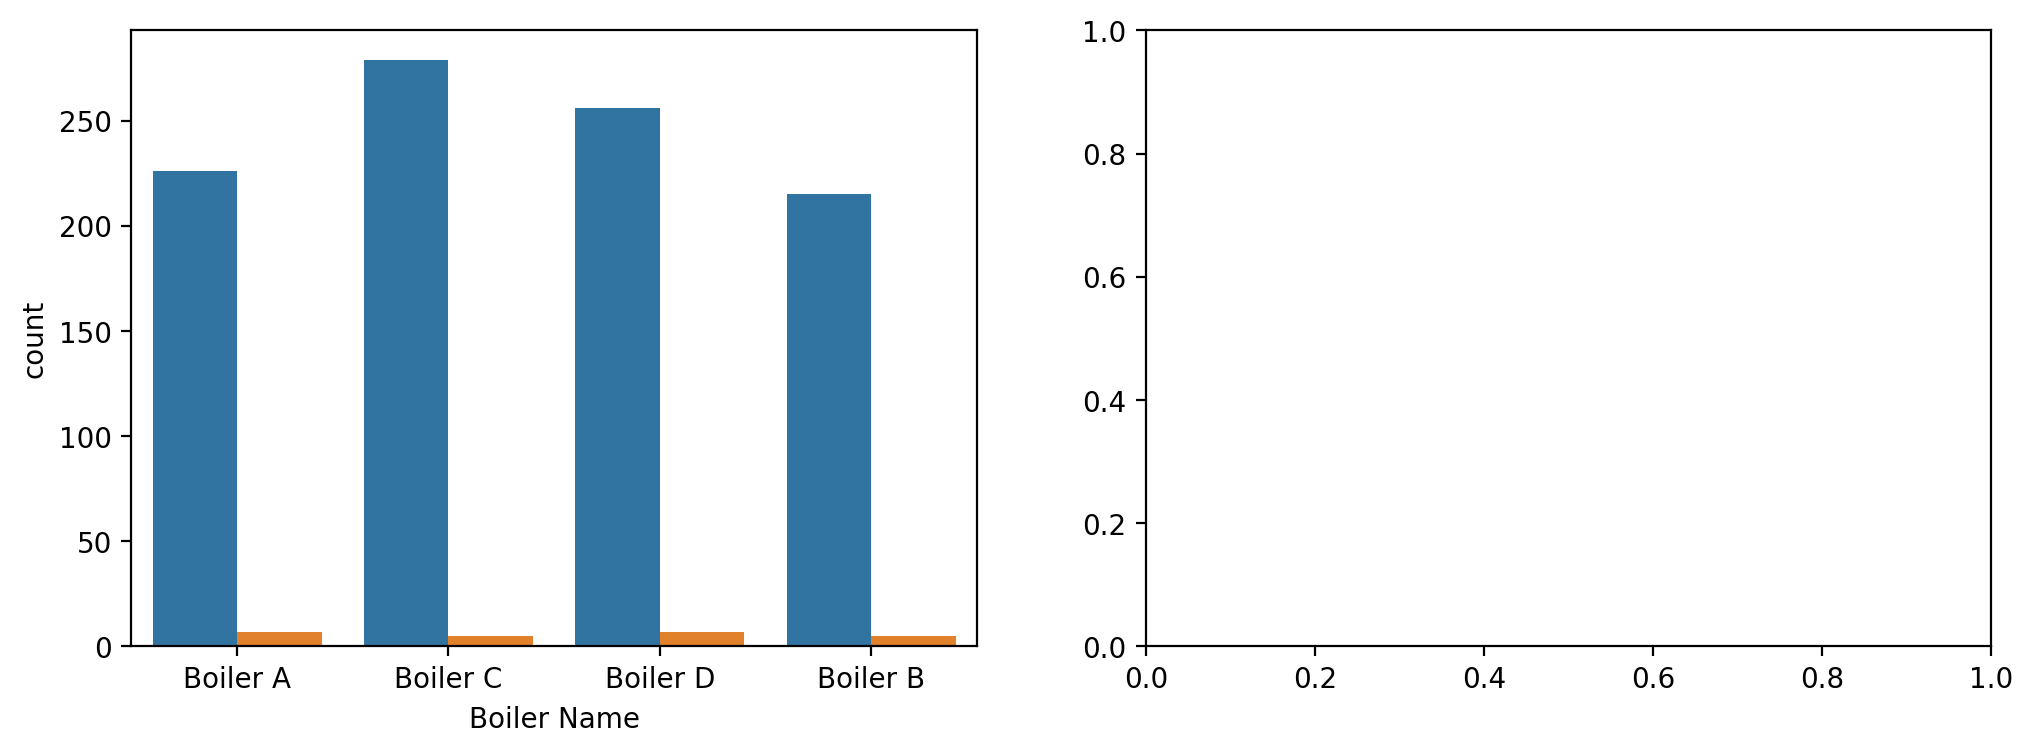

In [35]:
fig, ax = plt.subplots(1,2, figsize = (12,4), dpi = 200)

sns.countplot(data = df, x = 'Boiler Name', hue = 'Anomaly', ax = ax[0])
ax[0].set_title('Boiler Count')

sns.countplot(data = df, x = 'Boiler Name', hue = 'Anomaly', ax = ax[1])
ax[1].set_title('Boiler Count')
ax[1].set_ylim(0,10)

plt.tight_layout();

AttributeError: 'numpy.int64' object has no attribute 'startswith'

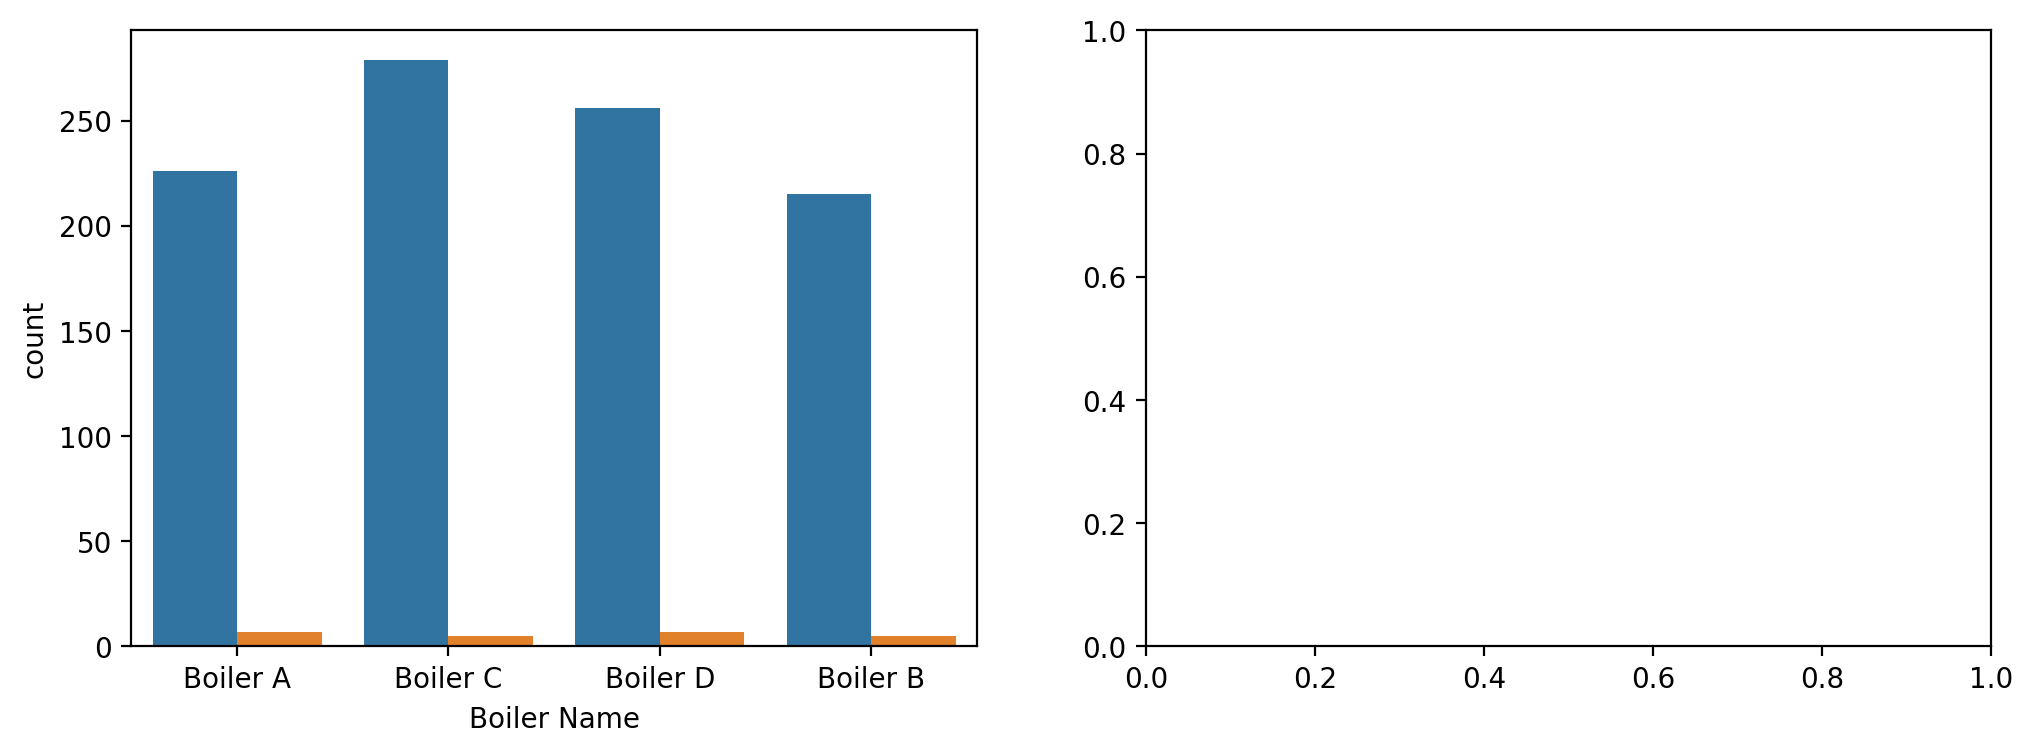

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), dpi=200)
sns.countplot(data=df, x='Boiler Name', hue='Anomaly', ax=ax[0])
ax[0].set_title('Boiler Count with Anomaly')
sns.countplot(data=df, x='Boiler Name', hue='Category', ax=ax[1])
ax[1].set_title('Boiler Count with Category')
plt.tight_layout()
plt.show()

C:\Users\neeth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\neeth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


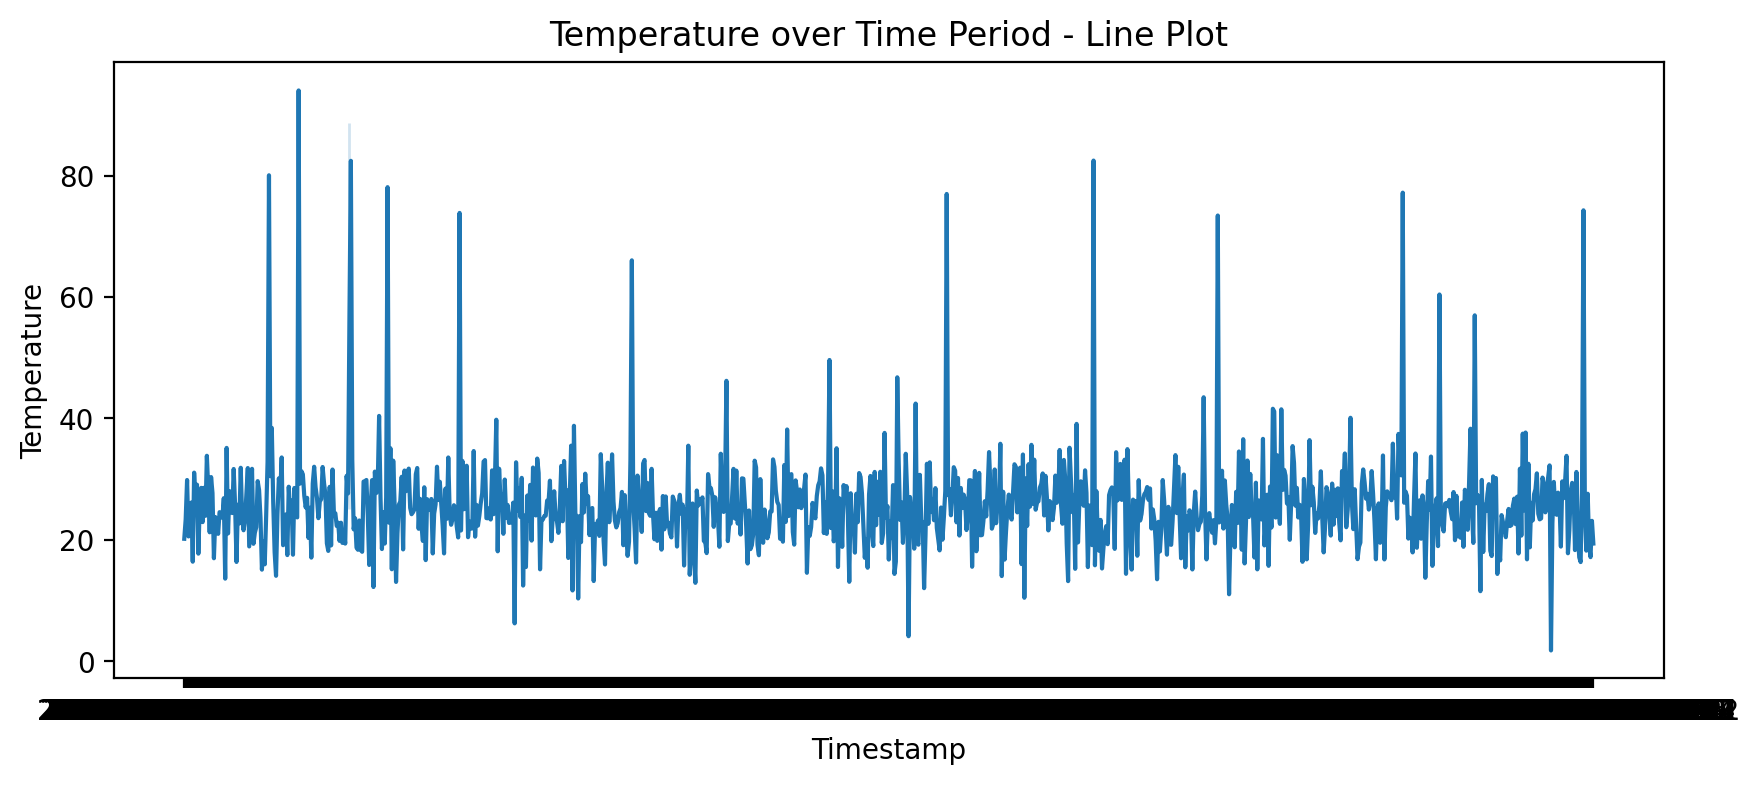

In [39]:
plt.figure(figsize = (10,4), dpi = 200)
sns.lineplot(data = df, x = 'Timestamp', y = 'Temperature')
plt.title('Temperature over Time Period - Line Plot');

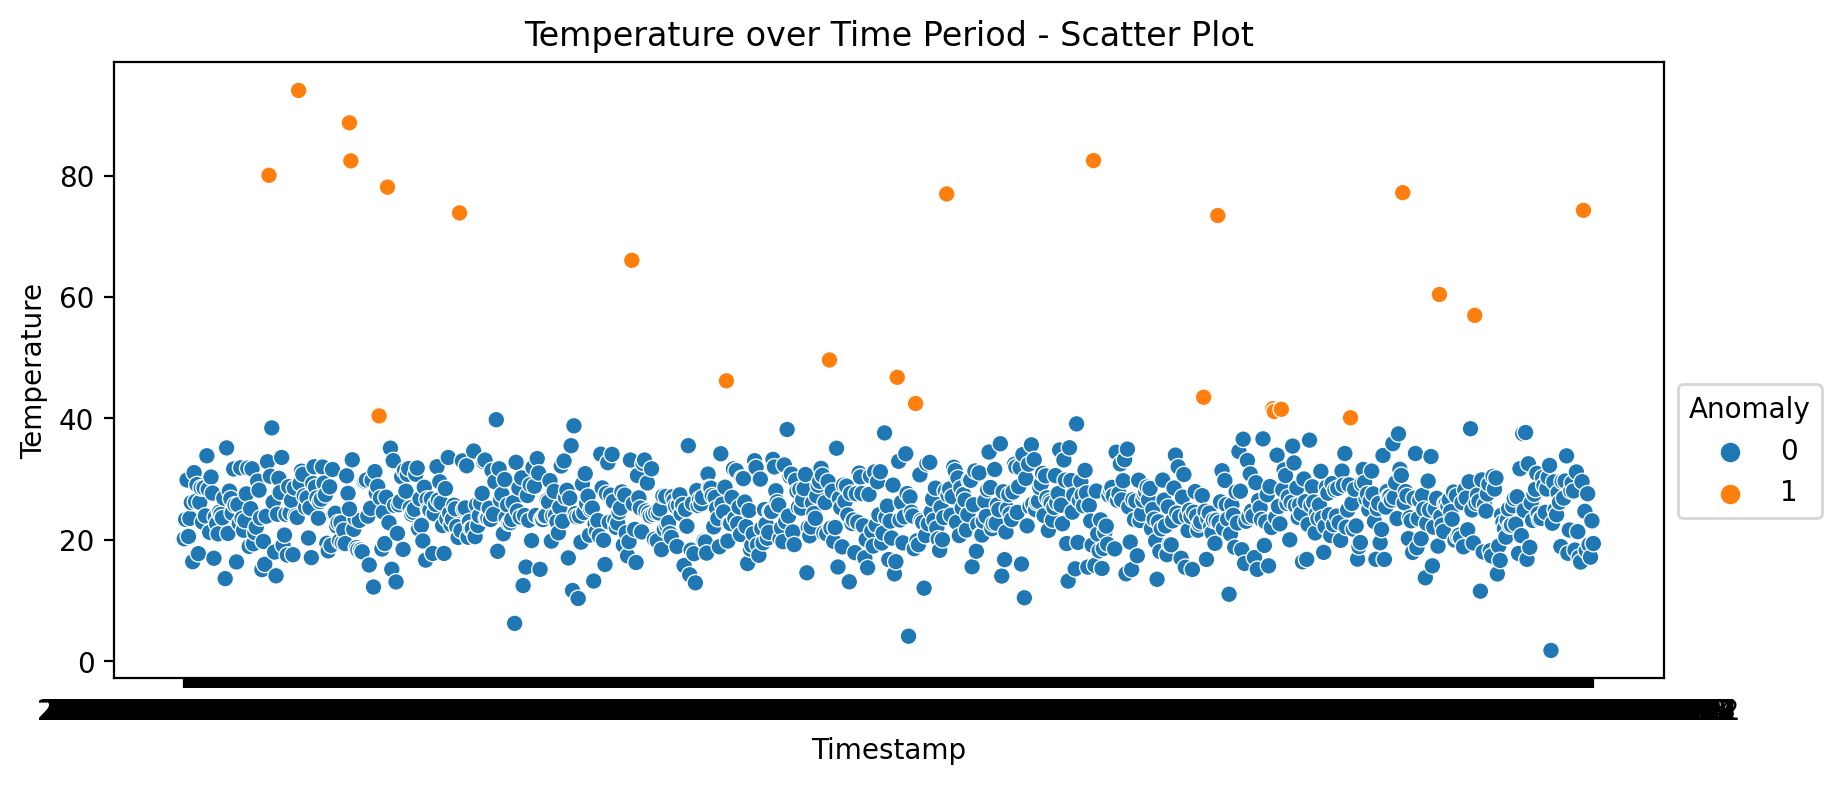

In [41]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = df, x = 'Timestamp', y = 'Temperature', hue = 'Anomaly')
plt.title('Temperature over Time Period - Scatter Plot')
plt.legend(title = 'Anomaly', bbox_to_anchor=(1, 0.5));

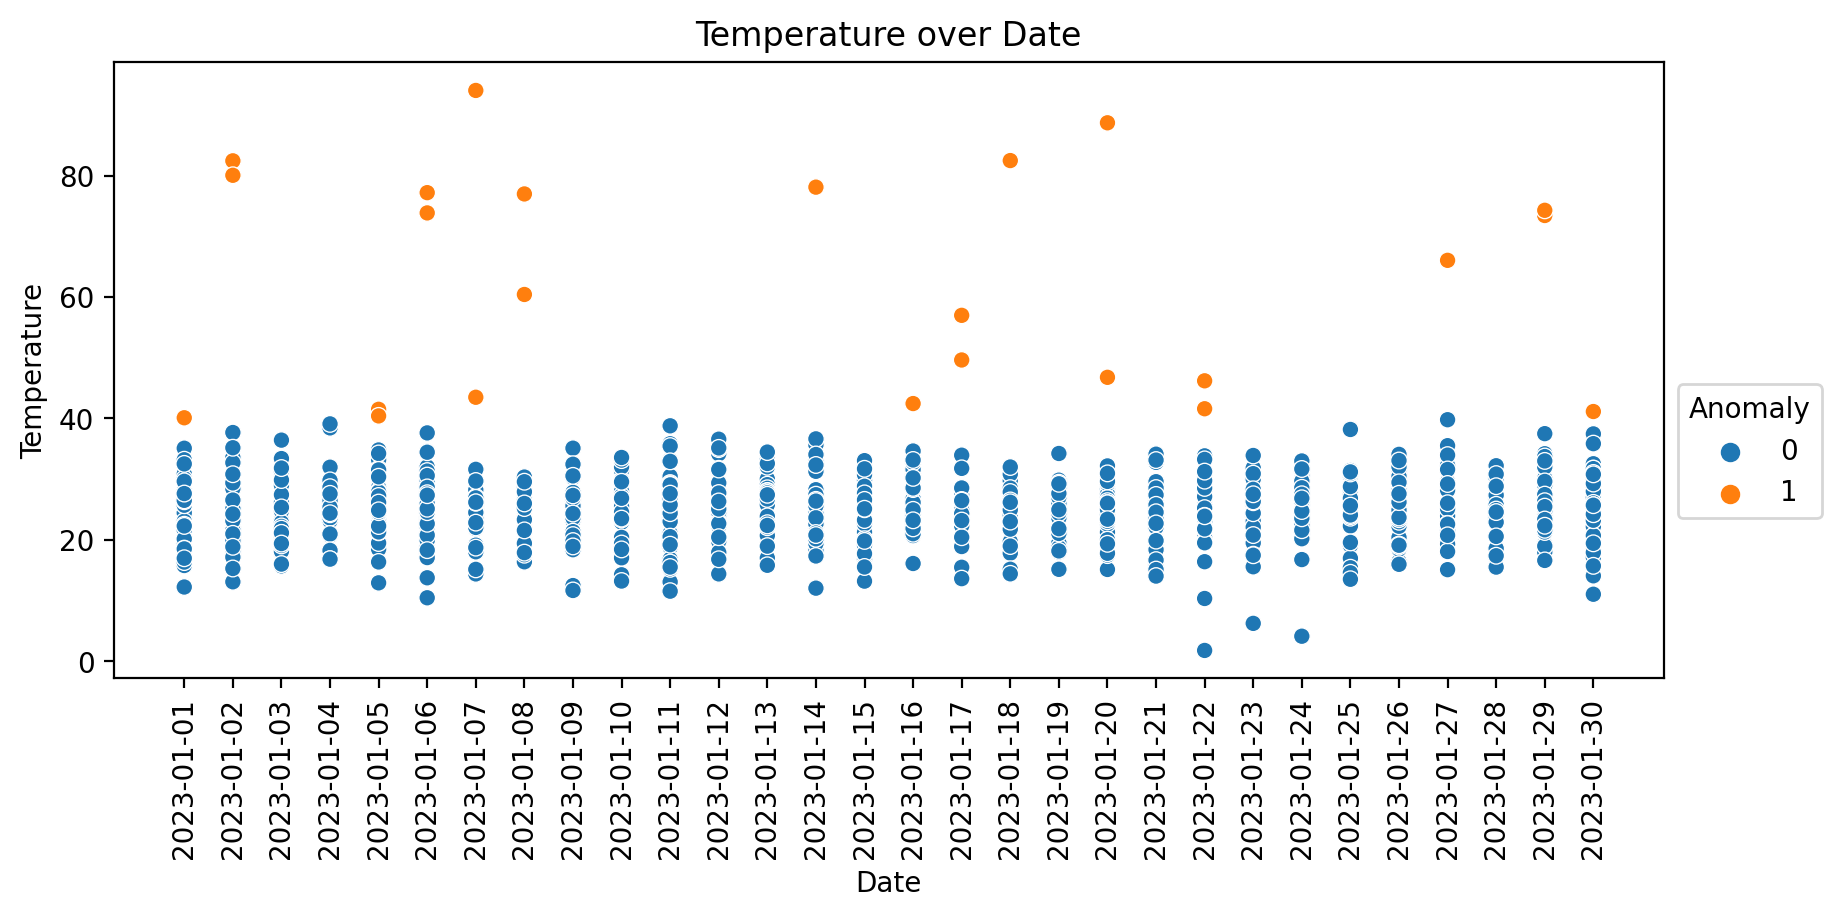

In [43]:
def extract_date(row):
    return row[:10]

df['Date'] = df['Timestamp'].apply(lambda x: extract_date(x))

plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = df.sort_values('Date'), x = 'Date', y = 'Temperature', hue = 'Anomaly')
plt.title('Temperature over Date')
plt.xticks(rotation = 90)
plt.legend(title = 'Anomaly', bbox_to_anchor=(1, 0.5));

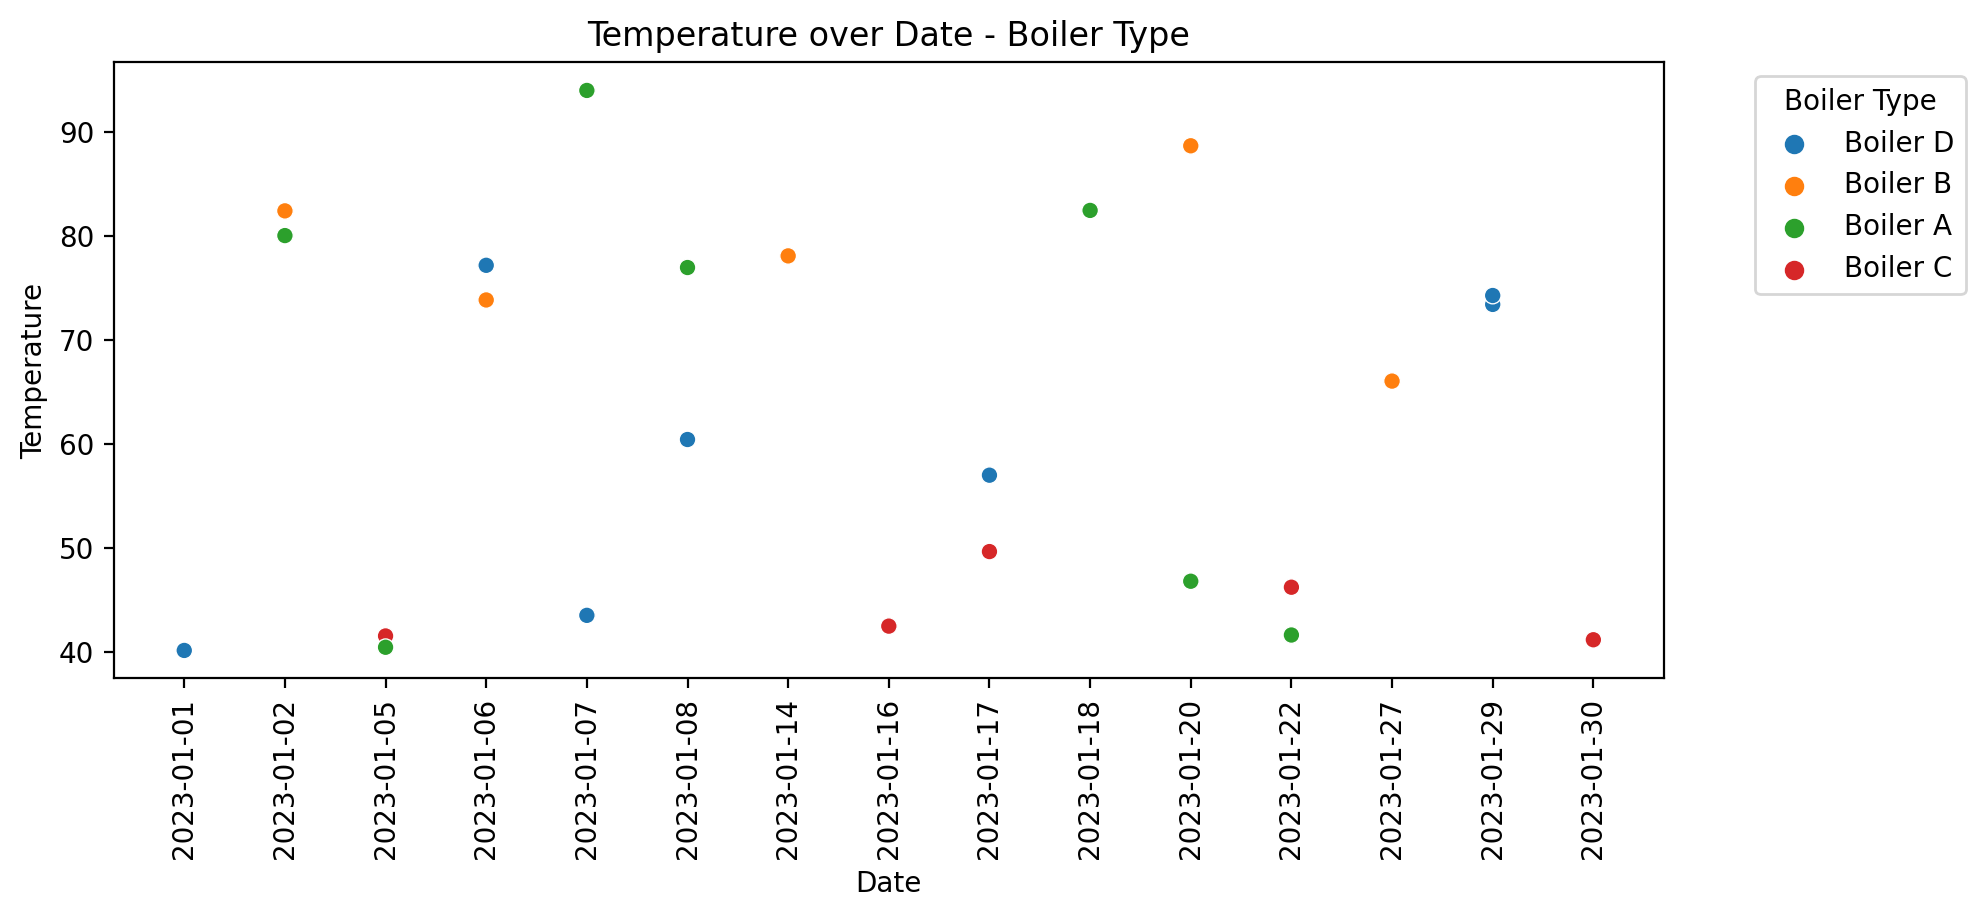

In [45]:
data = df.sort_values('Date')
data = data[data['Anomaly'] == 1]

plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(data = data, x='Date', y='Temperature', hue='Boiler Name')
plt.title('Temperature over Date - Boiler Type')
plt.xticks(rotation = 90)
plt.legend(title = 'Boiler Type', bbox_to_anchor=(1.05, 1), loc = 'upper left');
plt.show()

In [47]:
min_temp = df[df['Anomaly'] == 1]['Temperature'].min() 
print('Minimum Anamoly Temperature: ', min_temp)

max_temp = df[df['Anomaly'] == 1]['Temperature'].max() 
print('Maximum Anamoly Temperature: ', max_temp)

Minimum Anamoly Temperature:  40.10736181988482
Maximum Anamoly Temperature:  94.00750069529268


C:\Users\neeth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


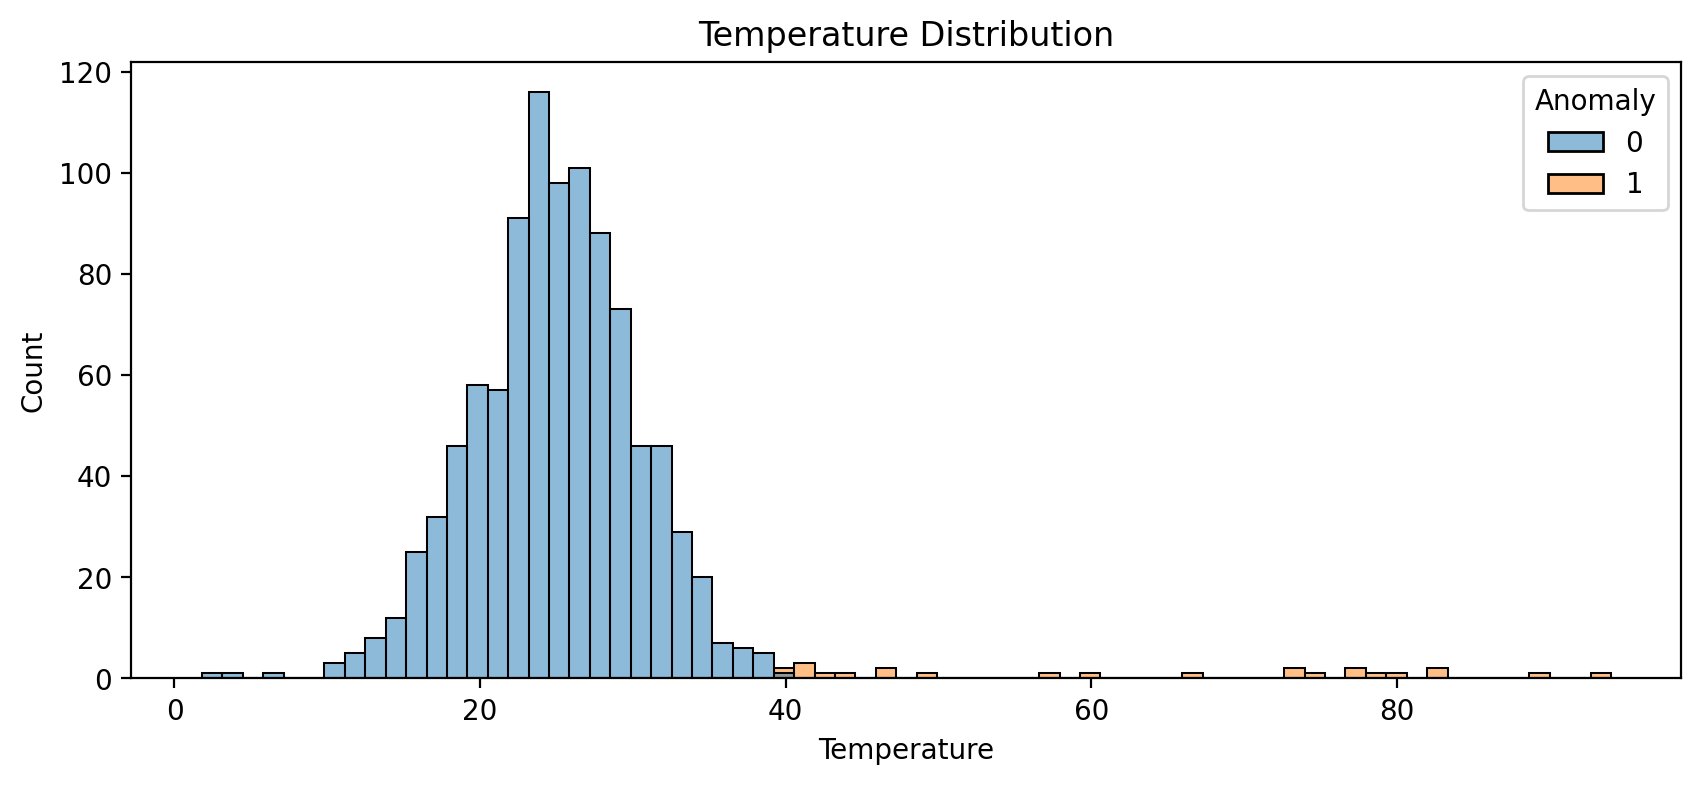

In [53]:
plt.figure(figsize = (10,4), dpi = 200)
sns.histplot(data = df, x = 'Temperature', hue = 'Anomaly')
plt.title('Temperature Distribution');


Noise Reduction

In [55]:
def moving_average_smoothing(data, window_size):
    
    smoothed_data = np.convolve(data, np.ones(window_size) / window_size, mode = 'valid')
    return smoothed_data

In [57]:
temperature_data = df['Temperature']
window_size = 12

smoothed_temperature_data = moving_average_smoothing(temperature_data, window_size)
df['Smoothed_Temperature'] = np.concatenate((np.full(window_size-1, np.nan), smoothed_temperature_data))

In [59]:
df.head()

,Timestamp,Boiler Name,Temperature,Anomaly,Date,Smoothed_Temperature
0,2023-01-23 00:58:20,Boiler A,20.180428,0,2023-01-23,NaN
1,2023-01-30 06:30:08,Boiler A,23.372948,0,2023-01-30,NaN
2,2023-01-03 10:47:23,Boiler A,29.858208,0,2023-01-03,NaN
3,2023-01-03 17:10:50,Boiler C,20.564032,0,2023-01-03,NaN
4,2023-01-04 17:50:22,Boiler D,23.547024,0,2023-01-04,NaN


In [61]:
df.isnull().sum()

Timestamp                0
Boiler Name              0
Temperature              0
Anomaly                  0
Date                     0
Smoothed_Temperature    11
dtype: int64

In [63]:
df = df.dropna()

C:\Users\neeth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


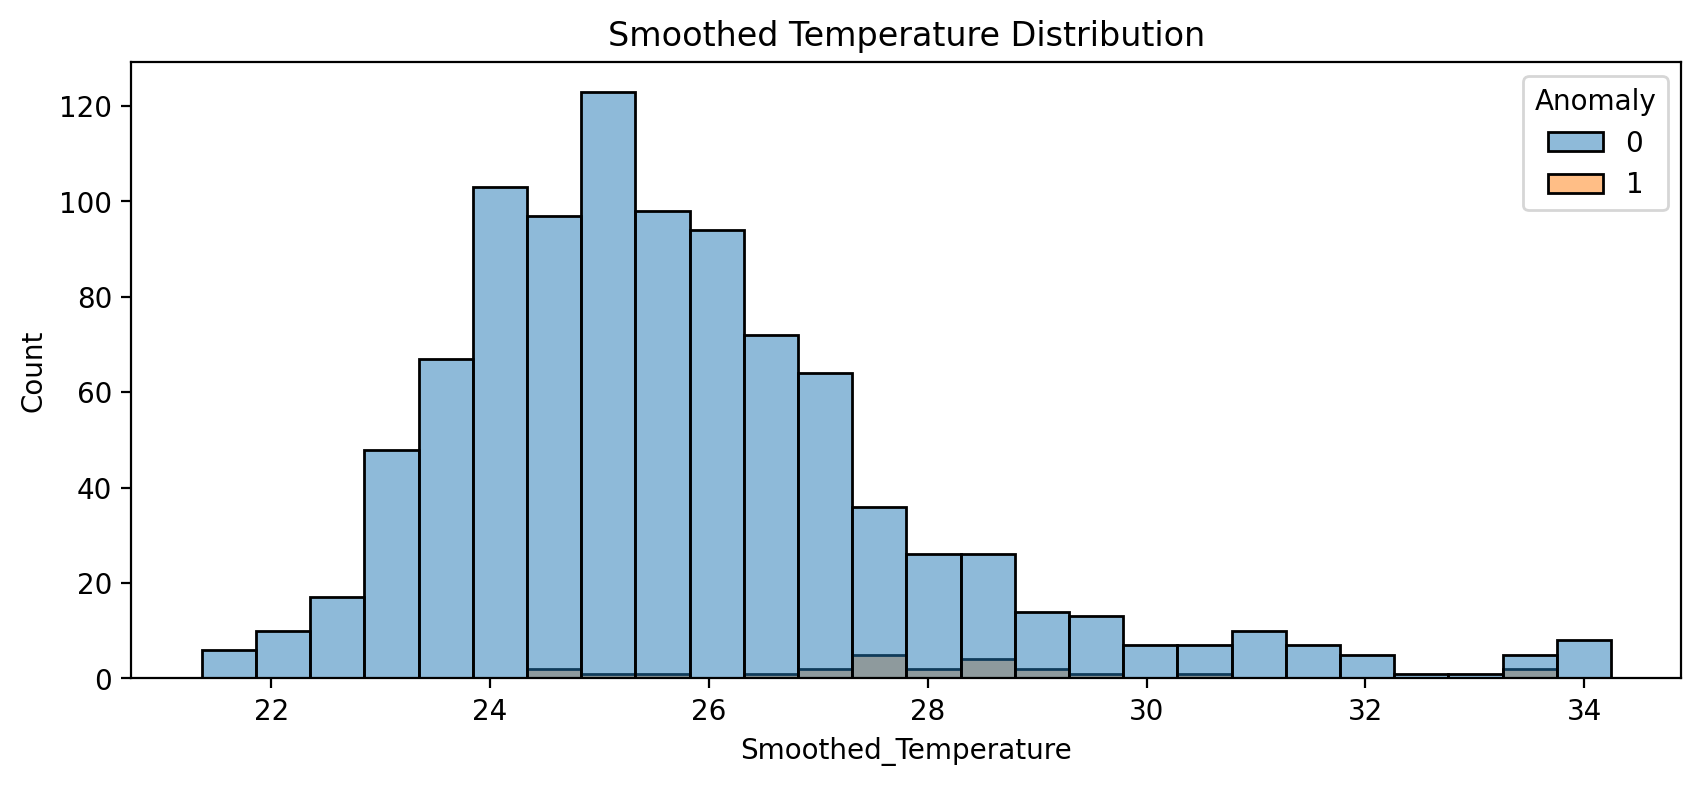

In [65]:
plt.figure(figsize = (10,4), dpi = 200)
sns.histplot(data = df, x = 'Smoothed_Temperature', hue = 'Anomaly')
plt.title('Smoothed Temperature Distribution');

Outlier Detection

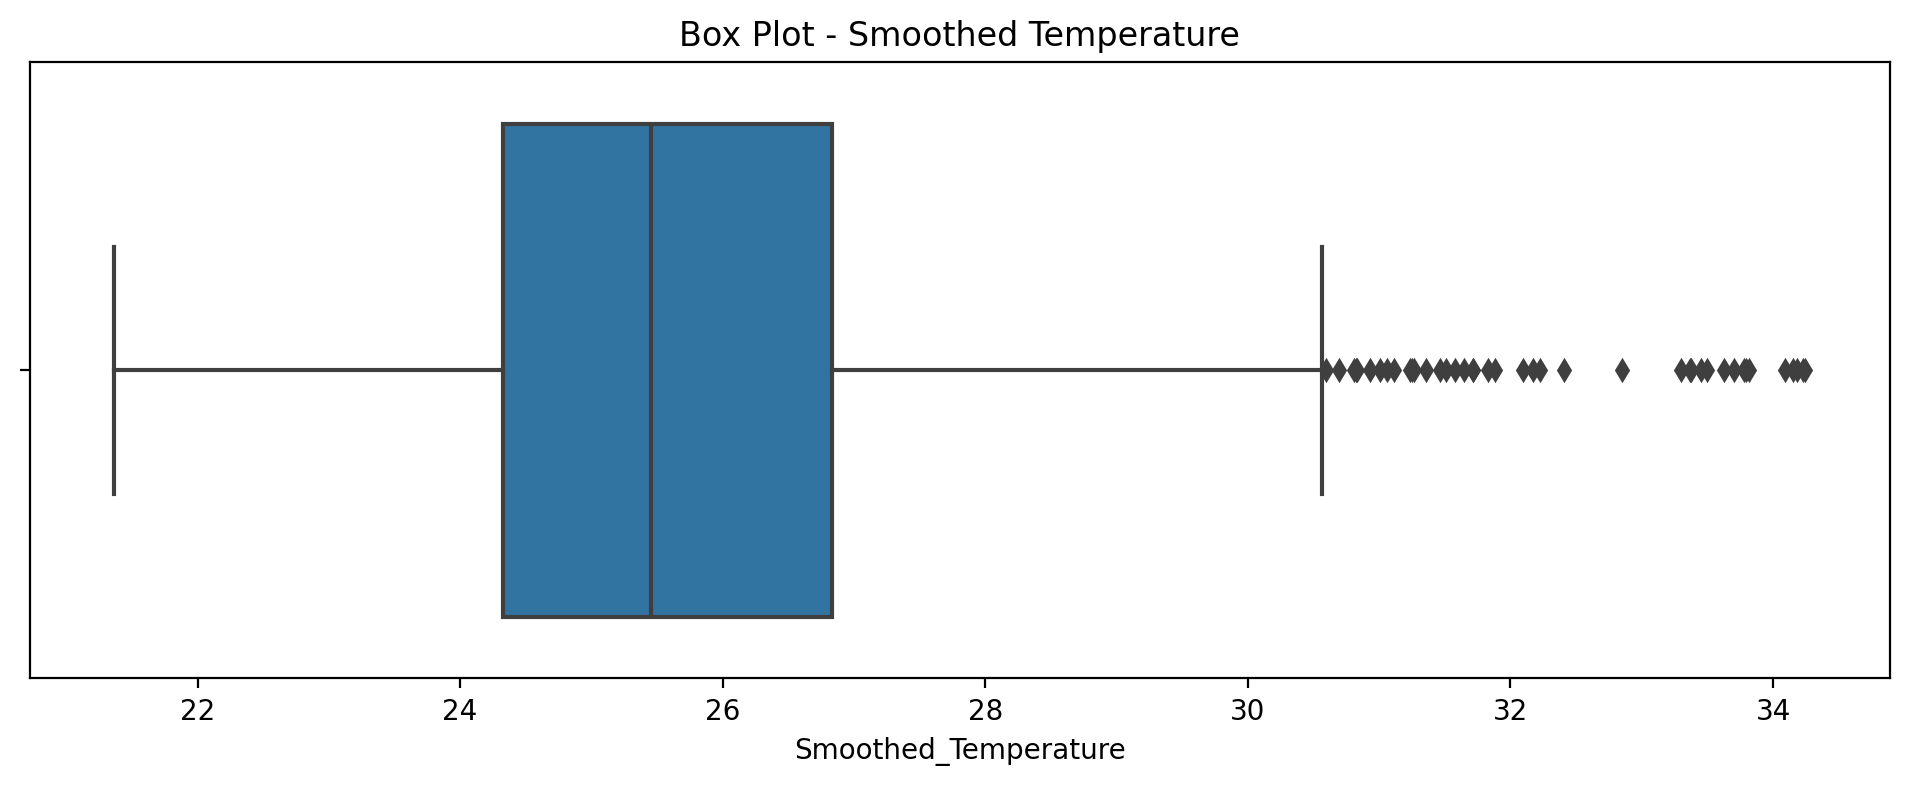

In [67]:
plt.figure(figsize = (12,4), dpi = 200)
sns.boxplot(data = df, x = 'Smoothed_Temperature', hue = 'Anomaly')
plt.title('Box Plot - Smoothed Temperature');

Outlier Removal

In [69]:
filtered_df_1 = df[df['Anomaly'] == 0]
filtered_df_2 = df[df['Anomaly'] == 1]

In [71]:
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    filtered_df = df.loc[~df.index.isin(df_outliers.index)]
    
    return filtered_df

In [73]:
df_1 = remove_outliers(filtered_df_1, 'Smoothed_Temperature')
df_2 = remove_outliers(filtered_df_2, 'Smoothed_Temperature')

In [75]:
df = pd.concat([df_1,df_2], axis = 0)

In [77]:
df = df.reset_index(drop = True)

Feature Engineering

In [79]:
df['Smoothed_Temperature'] = df['Smoothed_Temperature'].round(2)

In [81]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [83]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day

In [85]:
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second


Encoding

In [87]:
df_mod = pd.get_dummies(df['Boiler Name'])

In [89]:
df = pd.concat([df,df_mod], axis = 1)

In [91]:
cols = ['Boiler A','Boiler B','Boiler C', 'Boiler D']

for col in cols:
    df[col] = df[col].astype(int)

In [93]:
df.head()

,Timestamp,Boiler Name,Temperature,Anomaly,Date,Smoothed_Temperature,Year,Month,Day,Hour,Minute,Second,Boiler A,Boiler B,Boiler C,Boiler D
0,2023-01-18 14:40:26,Boiler C,26.186783,0,2023-01-18,24.21,2023,1,18,14,40,26,0,0,1,0
1,2023-01-21 00:54:48,Boiler A,28.565089,0,2023-01-21,24.90,2023,1,21,0,54,48,1,0,0,0
2,2023-01-10 21:12:20,Boiler A,22.923481,0,2023-01-10,24.87,2023,1,10,21,12,20,1,0,0,0
3,2023-01-24 19:58:40,Boiler C,28.575325,0,2023-01-24,24.76,2023,1,24,19,58,40,0,0,1,0
4,2023-01-22 10:00:15,Boiler B,23.956412,0,2023-01-22,25.04,2023,1,22,10,0,15,0,1,0,0


Feature Selection

In [95]:
df = df.drop(['Timestamp','Boiler Name', 'Date', 'Temperature'], axis = 1)

In [97]:
df.head()

,Anomaly,Smoothed_Temperature,Year,Month,Day,Hour,Minute,Second,Boiler A,Boiler B,Boiler C,Boiler D
0,0,24.21,2023,1,18,14,40,26,0,0,1,0
1,0,24.90,2023,1,21,0,54,48,1,0,0,0
2,0,24.87,2023,1,10,21,12,20,1,0,0,0
3,0,24.76,2023,1,24,19,58,40,0,0,1,0
4,0,25.04,2023,1,22,10,0,15,0,1,0,0


In [99]:
df.corr()['Anomaly'].sort_values(ascending = False)[1:]

Smoothed_Temperature    0.204429
Minute                  0.078916
Boiler A                0.024440
Hour                    0.023531
Boiler D                0.013118
Boiler B               -0.008750
Day                    -0.012687
Boiler C               -0.027480
Second                 -0.029149
Year                         NaN
Month                        NaN
Name: Anomaly, dtype: float64

In [101]:
df = df.drop(['Year','Month'], axis = 1)

In [103]:
df.head()

,Anomaly,Smoothed_Temperature,Day,Hour,Minute,Second,Boiler A,Boiler B,Boiler C,Boiler D
0,0,24.21,18,14,40,26,0,0,1,0
1,0,24.90,21,0,54,48,1,0,0,0
2,0,24.87,10,21,12,20,1,0,0,0
3,0,24.76,24,19,58,40,0,0,1,0
4,0,25.04,22,10,0,15,0,1,0,0


SMOTE

In [105]:
from imblearn.over_sampling import SMOTE

In [107]:
X = df.drop('Anomaly', axis = 1)
y = df['Anomaly']

In [109]:
smote = SMOTE(random_state = 101)
X_resampled, y_resampled = smote.fit_resample(X,y)

In [111]:
y_resampled.value_counts()

Anomaly
0    923
1    923
Name: count, dtype: int64

Model Building

In [113]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=101)


In [117]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('isolation_forest', IsolationForest(random_state = 101))
])

In [119]:
param_grid = {
    'isolation_forest__n_estimators': [100,200,300],
    'isolation_forest__contamination': [0.05, 0.1, 0.15, 0.5]
}

In [121]:
scorer = make_scorer(roc_auc_score)

In [123]:
grid_model = GridSearchCV(pipeline, param_grid, cv = 5, scoring = scorer)

In [125]:
X_train = pipeline.named_steps['scaler'].fit_transform(X_train)
X_test = pipeline.named_steps['scaler'].transform(X_test)

In [128]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('isolation_forest',
                                        IsolationForest(random_state=101))]),
             param_grid={'isolation_forest__contamination': [0.05, 0.1, 0.15,
                                                             0.5],
                         'isolation_forest__n_estimators': [100, 200, 300]},
             scoring=make_scorer(roc_auc_score))

In [130]:
best_params = grid_model.best_params_
print('Best Parameters: ', best_params)

Best Parameters:  {'isolation_forest__contamination': 0.5, 'isolation_forest__n_estimators': 300}


In [132]:
y_pred = grid_model.predict(X_test)

In [134]:
def map_prediction(value):
    if value == -1:
        return 0
    return value
        
y_pred = np.array([map_prediction(x) for x in y_pred])

In [136]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))

Accuracy Score:  0.9025270758122743


In [138]:
print('Precision Score: ',precision_score(y_test,y_pred))

Precision Score:  0.8939929328621908


In [140]:
print('Recall Score: ',recall_score(y_test,y_pred))

Recall Score:  0.9133574007220217


In [142]:
print('F1-Score: ',f1_score(y_test,y_pred))

F1-Score:  0.9035714285714286


In [144]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       277
           1       0.89      0.91      0.90       277

    accuracy                           0.90       554
   macro avg       0.90      0.90      0.90       554
weighted avg       0.90      0.90      0.90       554



In [146]:
roc_auc = roc_auc_score(y_test,y_pred)
print('ROC-AUC: ',roc_auc)

ROC-AUC:  0.9025270758122744


In [148]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

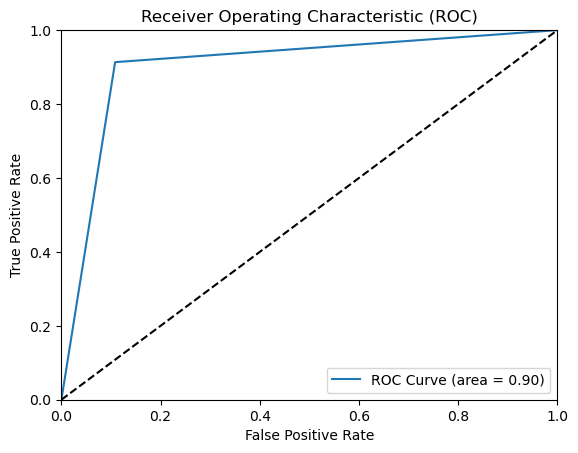

In [150]:
plt.figure()
plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

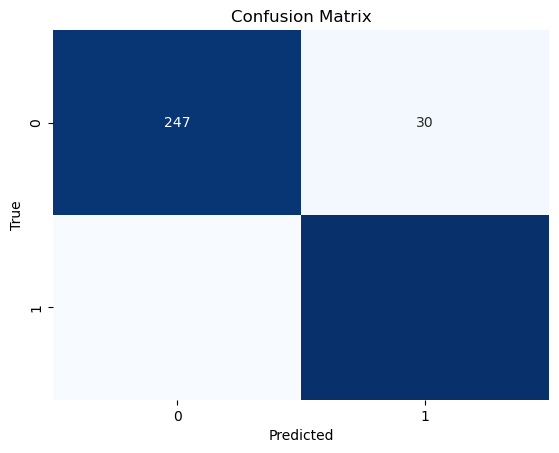

In [152]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt = 'd', cmap = 'Blues', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Model Prediction

In [154]:
X.head(1)

,Smoothed_Temperature,Day,Hour,Minute,Second,Boiler A,Boiler B,Boiler C,Boiler D
0,24.21,18,14,40,26,0,0,1,0


In [156]:
y.head(1)

0    0
Name: Anomaly, dtype: int64

In [158]:
grid_model.predict([[24.21,18,14,40,26,0,0,1,0]])

array([-1])